In [24]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash

In [39]:
# Data Loading
#1991-2021
df = pd.read_csv("hate_crime_latest.csv")
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226323,1445214,2021,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Lesbian (Female),Individual,S,S
226324,1445630,2021,WY0070200,Riverton,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
226325,1448544,2021,WY0190100,Green River,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Government/Public Building,Anti-American Indian or Alaska Native,Individual,S,S
226326,1448545,2021,WY0150000,Park,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Mental Disability,Individual,S,S


In [40]:
df_sikh = df[df['bias_desc'] == 'Anti-Sikh']
df_sikh

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
176034,176080,2015,DCMPD0000,Washington,NaN,City,DC,District of Columbia,South Atlantic,South,...,Multiple,Not Specified,1,Destruction/Damage/Vandalism of Property,1.0,Convenience Store,Anti-Sikh,Individual,S,S
177645,177679,2015,MOKPD0000,Kansas City,NaN,City,MO,Missouri,West North Central,Midwest,...,Unknown,Not Specified,1,Theft From Motor Vehicle,1.0,Rental Storage Facility,Anti-Sikh,Individual,S,S
177729,177763,2015,MT0250100,Helena,NaN,City,MT,Montana,Mountain,West,...,White,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-Sikh,Individual,S,S
177730,177764,2015,MT0250100,Helena,NaN,City,MT,Montana,Mountain,West,...,Unknown,Not Specified,1,Destruction/Damage/Vandalism of Property,0.0,Arena/Stadium/Fairgrounds/Coliseum,Anti-Sikh,Business,S,S
177731,177765,2015,MT0250100,Helena,NaN,City,MT,Montana,Mountain,West,...,White,Not Specified,1,Simple Assault,1.0,Residence/Home,Anti-Sikh,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226299,1446657,2021,WV0400000,Putnam,NaN,County,WV,West Virginia,South Atlantic,South,...,White,Not Specified,1,Simple Assault,1.0,Residence/Home,Anti-Sikh,Individual,S,S
226300,1446662,2021,WV0170200,Clarksburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Not Specified,Not Specified,1,Destruction/Damage/Vandalism of Property,0.0,Highway/Road/Alley/Street/Sidewalk,Anti-Sikh,Government,S,S
226306,1449499,2021,WV0310100,Morgantown,NaN,City,WV,West Virginia,South Atlantic,South,...,Not Specified,Not Specified,1,False Pretenses/Swindle/Confidence Game,0.0,Department/Discount Store,Anti-Sikh,Business,S,S
226307,1449500,2021,WV0310100,Morgantown,NaN,City,WV,West Virginia,South Atlantic,South,...,Not Specified,Not Specified,1,Shoplifting,0.0,Service/Gas Station,Anti-Sikh,Business,S,S


In [28]:
df_sikh['state_name'].value_counts()

North Carolina          57
Ohio                    46
West Virginia           46
Alabama                 44
Texas                   43
South Carolina          25
Georgia                 20
Washington              19
Michigan                14
Tennessee               13
Kansas                  13
Missouri                12
Utah                    10
California              10
Louisiana                9
Indiana                  8
Montana                  8
Wisconsin                6
Vermont                  5
Minnesota                4
Nevada                   4
Colorado                 3
Illinois                 3
New Mexico               3
Arizona                  2
Iowa                     2
South Dakota             2
Virginia                 2
Nebraska                 1
Oklahoma                 1
Arkansas                 1
Idaho                    1
North Dakota             1
Pennsylvania             1
District of Columbia     1
Name: state_name, dtype: int64

In [30]:
nan_counts = df_sikh.isna().sum()
nan_counts 

incident_id                       0
data_year                         0
ori                               0
pug_agency_name                   0
pub_agency_unit                 426
agency_type_name                  0
state_abbr                        0
state_name                        0
division_name                     0
region_name                       0
population_group_code             0
population_group_description      0
incident_date                     0
adult_victim_count                9
juvenile_victim_count            11
total_offender_count              0
adult_offender_count            132
juvenile_offender_count         132
offender_race                     0
offender_ethnicity                0
victim_count                      0
offense_name                      0
total_individual_victims          2
location_name                     0
bias_desc                         0
victim_types                      0
multiple_offense                  0
multiple_bias               

In [43]:
print(df_sikh[df_sikh['total_individual_victims'].isna() == True])

        incident_id  data_year        ori  \
206496       789292       2019  NV0020100   
217620       859180       2020  TX1080900   

                                 pug_agency_name agency_type_name state_abbr  \
206496  Las Vegas Metropolitan Police Department             City         NV   
217620                                  Mercedes             City         TX   

       state_name       division_name region_name population_group_code  ...  \
206496     Nevada            Mountain        West                    1A  ...   
217620      Texas  West South Central       South                     5  ...   

       offender_race  offender_ethnicity  victim_count   offense_name  \
206496       Unknown             Unknown             1          Arson   
217620         White  Hispanic or Latino             1  Not Specified   

       total_individual_victims                   location_name  bias_desc  \
206496                      NaN  Church/Synagogue/Temple/Mosque  Anti-Sikh   
217620

In [41]:
df_sikh = df_sikh.drop(['pub_agency_unit', 'adult_offender_count', 'juvenile_offender_count', 
                        'juvenile_victim_count','adult_victim_count' ], axis=1)
df_sikh

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
176034,176080,2015,DCMPD0000,Washington,City,DC,District of Columbia,South Atlantic,South,1B,...,Multiple,Not Specified,1,Destruction/Damage/Vandalism of Property,1.0,Convenience Store,Anti-Sikh,Individual,S,S
177645,177679,2015,MOKPD0000,Kansas City,City,MO,Missouri,West North Central,Midwest,1C,...,Unknown,Not Specified,1,Theft From Motor Vehicle,1.0,Rental Storage Facility,Anti-Sikh,Individual,S,S
177729,177763,2015,MT0250100,Helena,City,MT,Montana,Mountain,West,4,...,White,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-Sikh,Individual,S,S
177730,177764,2015,MT0250100,Helena,City,MT,Montana,Mountain,West,4,...,Unknown,Not Specified,1,Destruction/Damage/Vandalism of Property,0.0,Arena/Stadium/Fairgrounds/Coliseum,Anti-Sikh,Business,S,S
177731,177765,2015,MT0250100,Helena,City,MT,Montana,Mountain,West,4,...,White,Not Specified,1,Simple Assault,1.0,Residence/Home,Anti-Sikh,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226299,1446657,2021,WV0400000,Putnam,County,WV,West Virginia,South Atlantic,South,9B,...,White,Not Specified,1,Simple Assault,1.0,Residence/Home,Anti-Sikh,Individual,S,S
226300,1446662,2021,WV0170200,Clarksburg,City,WV,West Virginia,South Atlantic,South,5,...,Not Specified,Not Specified,1,Destruction/Damage/Vandalism of Property,0.0,Highway/Road/Alley/Street/Sidewalk,Anti-Sikh,Government,S,S
226306,1449499,2021,WV0310100,Morgantown,City,WV,West Virginia,South Atlantic,South,4,...,Not Specified,Not Specified,1,False Pretenses/Swindle/Confidence Game,0.0,Department/Discount Store,Anti-Sikh,Business,S,S
226307,1449500,2021,WV0310100,Morgantown,City,WV,West Virginia,South Atlantic,South,4,...,Not Specified,Not Specified,1,Shoplifting,0.0,Service/Gas Station,Anti-Sikh,Business,S,S


In [49]:
df_sikh
df_sikh.to_csv('FBI_Hate_Crimes_Anti-Sikh.csv', index=False)

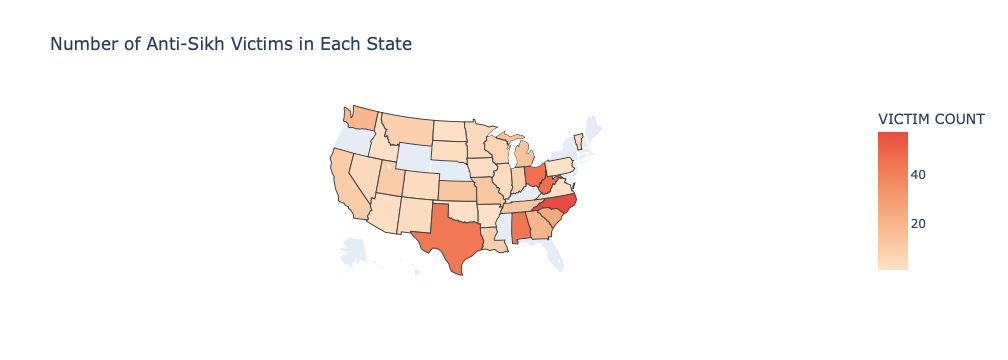

In [48]:
this_df = df_sikh.groupby('state_abbr').count()

this_df_groups = this_df.reset_index()
 
graph = this_df_groups[['state_abbr','victim_count']]


fig2 = go.Figure(data=go.Choropleth(
    locations=graph['state_abbr'], 
    z = graph['victim_count'], 
    locationmode = 'USA-states', 
    colorscale = 'peach',
    colorbar_title = "VICTIM COUNT",
))

fig2.update_layout(
    title_text = 'Number of Anti-Sikh Victims in Each State',
    geo_scope='usa', # limite map scope to USA
)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()